### Malaria Parasite Detection

##### What is Malaria Parasite data sets?
The Malaria dataset contains a total of 27,558 cell images with equal instances of `parasitized` and `uninfected cells` from the `thin blood smear slide images of segmented cells`.
<img src='malaria.JPG'>
DataSets Link:https://lhncbc.nlm.nih.gov/publication/pub9932
Download Image.zip file

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization,ZeroPadding2D
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Load Data Sets:

In [3]:
img_width = 64
img_height = 64

In [4]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [5]:
train_data_gen = datagen.flow_from_directory(directory='D:\DataSci\Data\cell_images\cell_images',
                                            target_size=(img_width,img_height),
                                            class_mode='binary',
                                            batch_size=16,
                                            subset='training')

Found 22048 images belonging to 2 classes.


In [6]:
validation_data_gen = datagen.flow_from_directory(directory='D:\DataSci\Data\cell_images\cell_images',
                                            target_size=(img_width,img_height),
                                            class_mode='binary',
                                            batch_size=16,
                                            subset='validation')

Found 5510 images belonging to 2 classes.


In [7]:
train_data_gen.labels

array([0, 0, 0, ..., 1, 1, 1])

### CNN model Building

In [8]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit_generator(generator=train_data_gen,
                              steps_per_epoch=len(train_data_gen),
                              epochs=5,
                              validation_data=validation_data_gen,
                              validation_steps=len(validation_data_gen))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1378 steps, validate for 345 steps
Epoch 1/5
1378/1378 [==============================] - 221s 161ms/step - loss: 0.4222 - accuracy: 0.7935 - val_loss: 0.2274 - val_accuracy: 0.9067
Epoch 2/5
1378/1378 [==============================] - 213s 154ms/step - loss: 0.2068 - accuracy: 0.9334 - val_loss: 0.1795 - val_accuracy: 0.9339
Epoch 3/5
1378/1378 [==============================] - 286s 208ms/step - loss: 0.1665 - accuracy: 0.9507 - val_loss: 0.1730 - val_accuracy: 0.9374
Epoch 4/5
1378/1378 [==============================] - 136s 99ms/step - loss: 0.1442 - accuracy: 0.9562 - val_loss: 0.1774 - val_accuracy: 0.9425
Epoch 5/5
1378/1378 [==============================] - 238s 173ms/step - loss: 0.1347 - accuracy: 0.9586 - val_loss: 0.1713 - val_accuracy: 0.9403


In [12]:
# ploting training and validation accuracy

def plotlearning_curve(history,epoch):
    epochs = range(1,epoch+1)
    plt.plot(epochs,history.history['accuracy'])
    plt.plot(epochs,history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('eopoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

# ploting training and validation loss
    plt.plot(epochs,history.history['loss'])
    plt.plot(epochs,history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend(['loss','val_loss'],loc='upper right')

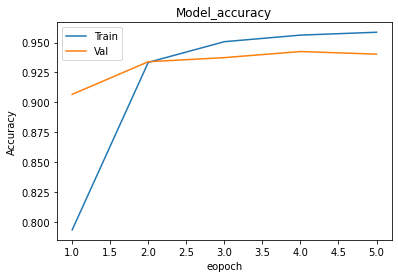

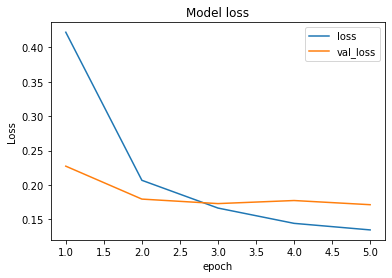

In [13]:
plotlearning_curve(history,5)